## Fresnelova difrakcija na jednostrukoj pukotini
#### Kod je pisan u Python programskom jeziku koristeći Jupyter notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.fftpack import fft      #paket za FFT
from scipy.fftpack import ifftshift,  fftshift

from mpl_toolkits.mplot3d import Axes3D   #paket za 3d plot
plt.style.use('dark_background')          # izbor boja za plot
plt.rcParams['image.cmap'] = 'plasma'

In [2]:

def Fresnel_input(lambd,w,z):
    N=1048   #rezolucija
    L=5.    # širina zaslona na kojem se javlja difrakciona slika

    lamb=lambd*10**(-6) #(mm) talasna dužina svjetlosti
#    w  #širina otvora (mm)
#    z  udaljenost otvor - zaslon (mm)
    k=2*np.pi/lamb   

    delta_src=L/N     #prostorna frekvencija

    #definisanje ravni otvora
    xv=np.linspace(-N/2,N/2-1,N)
    yv=np.linspace(-N/2,N/2-1,N)
    [x1,y1]=np.meshgrid(xv,yv)
    x1=x1*delta_src  #(mm)
    y1=y1*delta_src  # (mm) 
 
    #definisati pukotinu
    X=np.where(np.abs(x1)<w/4,1,0)
    
    u1=X  #elektricno polje na pukotini
    

#Fourierova transformacija (izračunavanje integrala)
    g=u1*np.exp(1j*np.pi/(lamb*z)*x1**2)
    G=fftshift(np.fft.fft(g))
    h=np.exp(1j*k*z)/(1j*lamb*z)*np.exp(1j*np.pi/(lamb*z)*x1**2)
    u2=h*G
    identity=np.ones((N,N))
    u2=u2*identity
    
#Intenzitet zračenja
    I=1./(lamb*z)**2*(np.abs(u2))**2
    I_1d=np.zeros(N, dtype='complex128')
    for a in range (1,N):
        I_1d[a]=I[0][a]
        
    I_1d=I_1d/I_1d.max()
        
    return(u2,I_1d,y1) #OUTPUT: električno polje na zaslonu, intenzitet i koordinate ravni otvora

In [3]:
lamb=632.
w=1.
z=20.

u1,I1,x1=Fresnel_input(lamb,w,20.)
u2,I2,x2=Fresnel_input(lamb,0.6*w,20.)
u3,I3,x3=Fresnel_input(lamb,0.6*w,200)

I1=I1/I1.max()
I2=I2/I2.max()
I3=I3/I3.max()

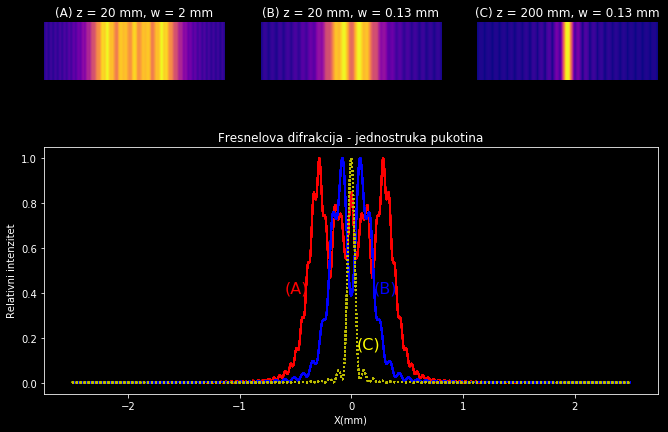

In [4]:
# PLOTANJE difrakcione slike i intenziteta zračenja
fig2=plt.figure(figsize=(11,10)) 

ax1=fig2.add_subplot(4,3,4)
plt.title('(A) z = 20 mm, w = 2 mm')
plt.imshow(np.abs(u1))
plt.xlim(324,724)
plt.ylim(460,588)
plt.axis('off')
plt.xlabel('(A)')


ax2=fig2.add_subplot(4,3,5)
plt.title('(B) z = 20 mm, w = 0.13 mm')
plt.imshow(np.abs(u2))
plt.xlim(324,724)
plt.ylim(460,588)
plt.xlabel('(B)')
plt.axis('off')

ax3=fig2.add_subplot(4,3,6)
plt.title('(C) z = 200 mm, w = 0.13 mm')
plt.imshow(np.abs(u3))
plt.xlim(324,724)
plt.ylim(460,588)
plt.xlabel('(C)')
plt.axis('off')

ax4=fig2.add_subplot(2,1,2)
plt.title('Fresnelova difrakcija - jednostruka pukotina')

ax4_1=ax4.plot(x1,np.abs(I1),'r-')
ax4_2=ax4.plot(x2,np.abs(I2),'b-')
ax4_3=ax4.plot(x2,np.abs(I3),'y:')

ax4.text(-0.6,0.4,'(A)', color='red',fontsize=16)
ax4.text(0.2,0.4,'(B)', color='blue',fontsize=16)
ax4.text(0.05,0.15,'(C)', color='yellow',fontsize=16)

plt.xlabel('X(mm)')
plt.ylabel('Relativni intenzitet')
fig2.savefig('Fresnel_1slit.png')
plt.show()